## Import packages

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

## Data manipulation

Generate 2 class dataset with equal number of labels in each class, random_state set to int value ensures reproducible output.

From sklearn about make_classification:

*"This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2 x class_sep and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data."*


In [13]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=1)
print(X.shape, y[0:5])

(1000, 20) [0 0 0 1 1]


Split into train/test sets

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2)

## Create models

Generate a no skill prediction (majority class), in this case "no skill" would mean guessing everying as one label which would be 50% correct as our sample has a 50:50 distribution of labels. No skill predictions allow us something to compare to

In [16]:
ns_probs = [0 for _ in range(len(test_y))]

Fit a model to compare against the no skill guesses. LBFGS stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm, which is used as the optimisation algorithm.

In [ ]:
model = LogisticRegression(solver='lbfgs') 
model.fit(train_X, train_y)

## Predict probabilities for Logistic Regression

In [19]:
lr_probs = model.predict_proba(test_X)
print(lr_probs[0:5,:])

[[0.00402732 0.99597268]
 [0.00200516 0.99799484]
 [0.99470117 0.00529883]
 [0.84762581 0.15237419]
 [0.00166665 0.99833335]]


The probabilities returned are in the format of one row per observation, with a column for the probability for each label in order.

For example if an output has a probability of 0.00402732 of being a 0 label, the compliment (a label of 1) would have a probability of 1-0.00402732 = 0.99597268.

By filtering the output to only keep the second column we only keep the probabilities for the positive label.

In [20]:
lr_probs = lr_probs[:, 1]

## Assess performance

We can then calculate the Receiver Operator Characteristic (ROC) Area Under Curve (AUC) for the Logistic Regression and the no skill guess.

In [21]:
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)

Summarise scores

In [22]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


Calculate roc curves

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)

Plot the roc curves

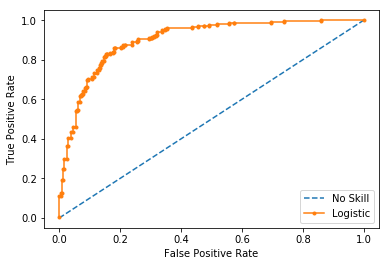

In [6]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()